<a href="https://colab.research.google.com/github/KamilShape/whey_analysis/blob/main/Whey_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Introduction**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# **2.Dataset**

In [2]:
#dataset load
whey = pd.read_csv('/content/whey1.csv', encoding='latin1')

In [3]:
whey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             125 non-null    int64  
 1   Name           125 non-null    object 
 2   Company        125 non-null    object 
 3   Brand          125 non-null    object 
 4   Package        125 non-null    float64
 5   Package_type   125 non-null    object 
 6   Calories       125 non-null    float64
 7   Fat            125 non-null    float64
 8   Saturated_fat  125 non-null    float64
 9   Carbs          125 non-null    float64
 10  Sugar          125 non-null    float64
 11  Protein        125 non-null    float64
 12  WPC            125 non-null    float64
 13  WPI            125 non-null    float64
 14  Soy            125 non-null    float64
 15  Yeast          125 non-null    float64
 16  Pea            125 non-null    float64
 17  Casein         125 non-null    float64
 18  Cannabis  

In [4]:
#price per 100g
whey['Price/100'] = whey['Price']/whey['Package']*100

In [5]:
whey.head(10)

,id,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,...,WPC,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100
0,1,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.00,4.2,6.9,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
1,2,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.00,4.2,6.9,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143
2,3,WPC PROTEIN PLUS 900g,SFD,SFD Nutrition,900.0,bag,394.0,6.00,4.2,6.9,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,69.99,7.776667
3,4,WPC PROTEIN PLUS 2250g,SFD,SFD Nutrition,2250.0,bag,394.0,6.00,4.2,6.9,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,154.99,6.888444
4,5,WPC PROTEIN PLUS 3000g,SFD,SFD Nutrition,3000.0,box,394.0,6.00,4.2,6.9,...,97.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,199.99,6.666333
5,6,WPC PROTEIN ECONO 750G,SFD,SFD Nutrition,750.0,bag,387.0,6.50,3.5,12.2,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,44.99,5.998667
6,7,WPC PROTEIN ECONO 2250G,SFD,SFD Nutrition,2250.0,bag,387.0,6.50,3.5,12.2,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,139.99,6.221778
7,8,WPI ISOWHEY INSTANT 700g,SFD,SFD Nutrition,750.0,bag,366.0,1.55,1.0,2.7,...,0.0,80.24,0.0,0.0,0.0,0.0,0.0,0.0,71.99,9.598667
8,9,WPI ISOWHEY INSTANT 1800g,SFD,SFD Nutrition,2250.0,bag,366.0,1.55,1.0,2.7,...,0.0,80.24,0.0,0.0,0.0,0.0,0.0,0.0,169.99,7.555111
9,10,WHEY PROTEIN 300g,SFD,Allnutrition,300.0,bag,403.0,6.60,3.6,16.0,...,87.5,0.00,0.0,0.0,0.0,0.0,0.0,0.0,4.99,1.663333


In [6]:
#avg price
whey['Price'].mean()

134.30504000000002

In [7]:
#avg price per 100g
whey['Price/100'].mean()

12.283923080098141

#**3.Data Visualisation**

In [10]:
#bar chart function
def bar_chart(ax, x, y, color, title, *ylabel):
  ax.bar(x, y, color=color, width=0.6)
  ax.set_title(title)
  ax.set_ylabel(ylabel)

#add text function
def add_text(chart, x, y, move_y, angle, move_x = 0,):
  for i in range(0, len(x)):
    x_value = x[i]
    if type(x[i]) != str:
      x_value = x[i] + move_x
    chart.text(x_value, y[i]-move_y, round(y[i], 2), horizontalalignment='center', rotation=angle)

<ipython-input-9-c3d2dbed5ad7>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


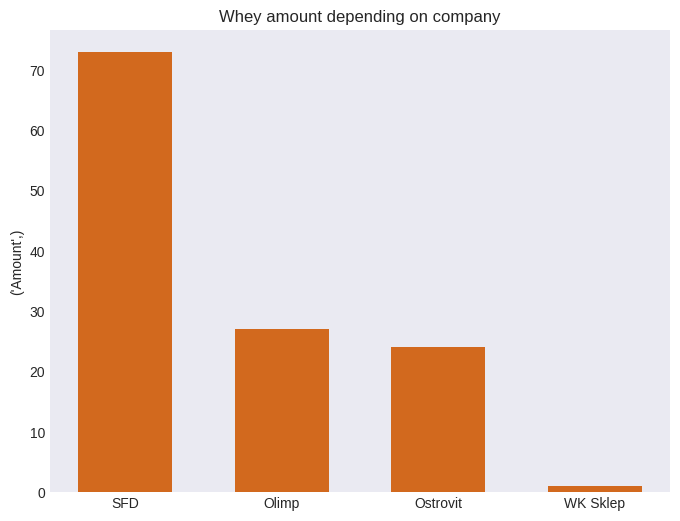

In [9]:
#products amount depending by company in dataset
plt.style.use('seaborn-dark')
fig, ax = plt.subplots(figsize = (8,6))
bar_chart(ax, whey['Company'].value_counts().index, whey['Company'].value_counts().values, 'chocolate', 'Whey amount depending on company', 'Amount' )

In [100]:
#sort products by price
# les100 = len(whey[whey['Price'] <= 100])
# less200 = len(whey[(whey['Price'] > 100) & (whey['Price'] < 200)])
# more200 = len(whey[whey['Price'] > 200])
# prices = [les100, less200, more200]

In [125]:
whey['Package_category'] = pd.cut(whey['Package'], bins = [0, 999, 1999, 5000], labels = ['>1000g', '1000g - 2000g', '>2000g'] )

In [126]:
whey

,id,Name,Company,Brand,Package,Package_type,Calories,Fat,Saturated_fat,Carbs,...,WPI,Soy,Yeast,Pea,Casein,Cannabis,Beef,Price,Price/100,Package_category
0,1,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.0,4.2,6.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143,>1000g
1,2,WPC PROTEIN PLUS 700g,SFD,SFD Nutrition,700.0,bag,394.0,6.0,4.2,6.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.99,8.427143,>1000g
2,3,WPC PROTEIN PLUS 900g,SFD,SFD Nutrition,900.0,bag,394.0,6.0,4.2,6.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.99,7.776667,>1000g
3,4,WPC PROTEIN PLUS 2250g,SFD,SFD Nutrition,2250.0,bag,394.0,6.0,4.2,6.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,154.99,6.888444,>2000g
4,5,WPC PROTEIN PLUS 3000g,SFD,SFD Nutrition,3000.0,box,394.0,6.0,4.2,6.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.99,6.666333,>2000g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,Olimp Provit® 80 - 700 g,Olimp,Olimp,700.0,bag,356.0,3.0,0.2,2.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.00,9.714286,>1000g
121,122,Olimp Pure Whey Isolate 95® - 1800 g,Olimp,Olimp,1800.0,bag,352.0,0.5,0.5,1.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00,14.333333,1000g - 2000g
122,123,Olimp Pure Whey Isolate 95® - 2200 g,Olimp,Olimp,2200.0,box,352.0,0.5,0.5,1.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,328.00,14.909091,>2000g
123,124,Olimp Pure Whey Isolate 95® - 600 g,Olimp,Olimp,600.0,box,352.0,0.5,0.5,1.0,...,86.0,0.0,0.0,0.0,0.0,0.0,0.0,89.00,14.833333,>1000g


In [72]:
# for i in range(0, len(whey['Company'].value_counts())):
#   ax[0,0].text(whey['Company'].value_counts().index[i], whey['Company'].value_counts().values[i] + 1, horizontalalignment='center', s=whey['Company'].value_counts().values[i])

In [112]:
whey['Package_type'][33] = 'bag'

<ipython-input-112-a506d8a131fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  whey['Package_type'][33] = 'bag'


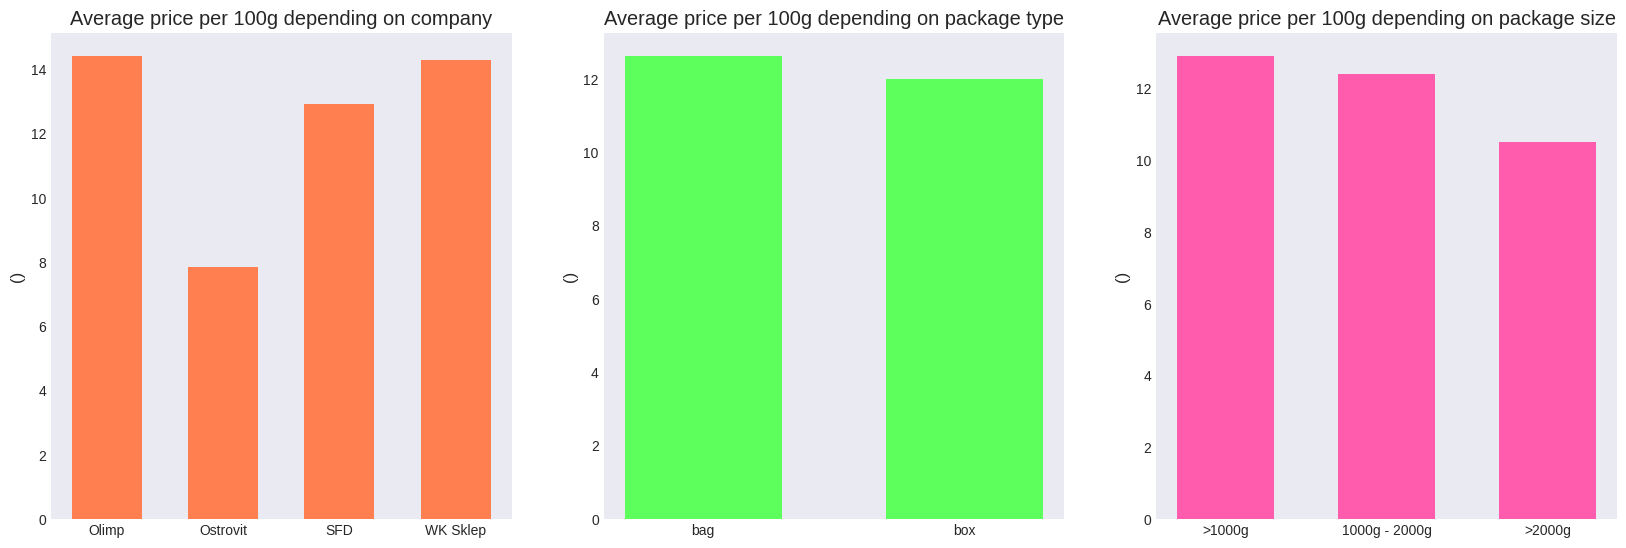

In [135]:
fig, ax = plt.subplots(1,3, figsize = (18,6))

bar_chart(ax[0], whey.groupby('Company')['Price/100'].mean().index, whey.groupby('Company')['Price/100'].mean().values, '#FF7F50', 'Average price per 100g depending on company')
bar_chart(ax[1], whey.groupby('Package_type')['Price/100'].mean().index, whey.groupby('Package_type')['Price/100'].mean().values, '#5CFF5C', 'Average price per 100g depending on package type')
bar_chart(ax[2], whey.groupby('Package_category')['Price/100'].mean().index, whey.groupby('Package_category')['Price/100'].mean().values, '#FF5CAD', 'Average price per 100g depending on package size')
